0 Cost= 121.80134092382158
weight parameters: [-2.06468432e-07  2.55865617e-01  4.55948118e-02]
cost: 113.5920829154299
training mse(normalised): 0.9281719133799106
mse between actual and predicted output: [40.21327628]


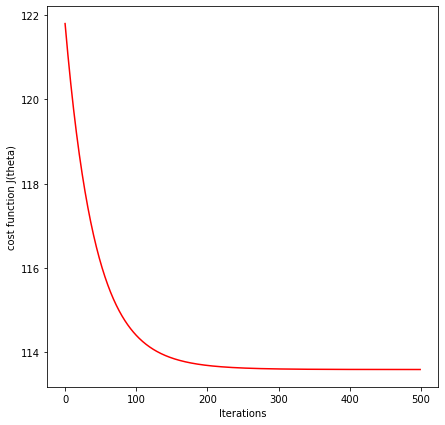

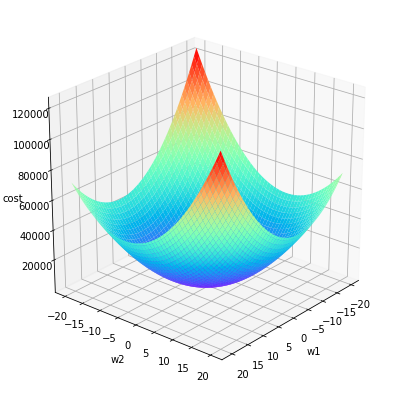

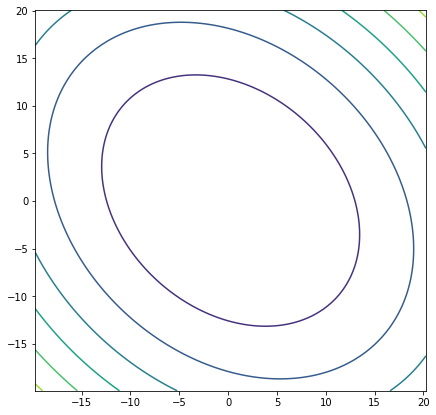

<Figure size 504x504 with 0 Axes>

In [8]:
#BatchGradientDescent with L1 norm regularization
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import cm
plt.rcParams['figure.figsize'] = (7.0, 7.0)

def upload_data(file_name):
  data = pd.read_excel(file_name, header=None)
  x1 = data.iloc[:,1]
  x2 = data.iloc[:,0]
  y = data.iloc[:,-1]
  mean1 = x1.mean()
  mean2 = x2.mean()
  mean3 = y.mean()
  std1 = x1.std()
  std2 = x2.std()
  std3 = y.std()
  x1 = (x1-mean1)/std1
  x2 = (x2-mean2)/std2
  y = (y-mean3)/std3

  X = np.column_stack((x1,x2))
  X = np.column_stack((np.ones(len(x1)),X))
  X = np.array(X)
  Y= np.array(y)
  return X,Y, mean1, mean2, mean3, std1, std2, std3

def upload_input(file_name, mean1, mean2, std1, std2):
  data = pd.read_excel(file_name, header=None)
  x1 = data.iloc[:,1]
  x2 = data.iloc[:,0]
  x1 = (x1-mean1)/std1
  x2 = (x2-mean2)/std2
  X1 = np.column_stack((x1,x2))
  X1 = np.column_stack((np.ones(len(x1)),X1))
  X1 = np.array(X1)
  return X1

def upload_output(file_name):
  data = pd.read_excel(file_name, header=None)
  Y1 = np.array(data)
  return Y1

class LeastAngleRegression(object):

  def __init__(self, alpha, iterations, lambda1):
    self.alpha = alpha
    self.iterations = iterations
    self.lambda1 = lambda1

  def calc_costfunc(self, X, Y, theta, lambda1):
    m = X.shape[0]
    n = X.shape[1]
    cost = 0.0
    sum_wt = 0.0
    for i in range(m):
      x = X[i]
      h = 0.0
      for j in range(n):
        h += theta[j] * x[j]
        sum_wt += np.abs(theta[j])
      error = h - Y[i]
      cost += 0.5*(error**2)  

    return cost+(lambda1*sum_wt)


  def batch_grad_descent(self, X, Y):
    m = X.shape[0]
    n = X.shape[1]
    self.cost = np.zeros(self.iterations)
    self.theta = np.zeros(X.shape[1])
    self.mse = 0.0
    for iteration in range(self.iterations):
      temp = self.theta
      gradient = np.zeros(n)
      for i in range(m):
        x = X[i]
        h = 0.0
        error = 0.0
        for j in range(n):
          h += self.theta[j] * x[j]
        error = h - Y[i] 
        self.mse += (error**2) * (1.0/m)
        for j in range(n):
          gradient[j] += error * x[j]
      for j in range (n):
        temp[j] = (self.theta[j]-(self.alpha*self.lambda1*np.sign(self.theta[j]))/m) - (self.alpha* gradient[j]*(1.0/m))
      self.theta = temp
      self.cost[iteration] = self.calc_costfunc(X, Y, self.theta, self.lambda1)
      
      if iteration%500 == 0: 
        print(iteration, "Cost=", self.cost[iteration])    
    self.mse = self.mse *(1.0/self.iterations)

    return self

  def predict(self, X1, Y1, mean3, std3, theta1):
    m = X1.shape[0]
    n = X1.shape[1]
    Y_predicted = np.zeros(X1.shape[0])
    mse1 = 0.0
    for i in range(m):
        x = X1[i]
        h = 0.0
        for j in range(n):
          h += theta1[j] * x[j]
        Y_predicted[i] = h

    Y_predicted = (Y_predicted*std3) + mean3 
    Y_predicted = np.array(Y_predicted)
    for i in range(m):
        error = Y_predicted[i] - Y1[i]
        mse1 += (error**2)

    mse1 = mse1 * (1.0/m)
    return mse1, Y_predicted

  def plot_results(self, X, Y):

      #plotting cost function J vs no. of iterationsplt.subplot(1,1,1)
      plt.plot(self.cost, 'r-')
      plt.xlabel('Iterations')
      plt.ylabel('cost function J(theta)')

      #plotting cost function vs w1 and w2 as a 3D graph
      fig = plt.figure(figsize = (7,7))
      ax = fig.gca(projection = "3d")
      ax.set_xlabel(r'w1')
      ax.set_ylabel(r'w2')
      ax.set_zlabel(r'cost')
      ax.view_init(elev = 25, azim = 40)
      ms = np.linspace(self.theta[1] - 20, self.theta[1] + 20, 100)
      bs = np.linspace(self.theta[2] - 20, self.theta[2] + 20, 100)
      Xs, Ys = np.meshgrid(ms, bs)
      Zs = np.array([self.calc_costfunc(X, Y, [1,w1,w2], self.lambda1)
              for w1, w2 in zip(np.ravel(Xs), np.ravel(Ys))])
      Zs = np.reshape(Zs, Xs.shape)
      ax.plot_surface(Xs, Ys, Zs, cmap=cm.rainbow)
      



      #plotting cost function vs w1 and w2 as a contour plot
      ax = plt.figure().gca()
      fig = plt.figure(figsize=(7,7))
      ax.plot(self.theta[1], self.theta[2], "b-")
      ax.contour(Xs, Ys, Zs)

def main():
  ##upload the .xlsx file with features and outputs and enter the name below
  training_file_name = 'training_feature_matrix.xlsx'
  X, Y, mean1, mean2, mean3, std1, std2, std3 = upload_data(training_file_name)
  test_input_file_name = 'test_feature_matrix.xlsx'
  X1 = upload_input(test_input_file_name, mean1, mean2, std1, std2)
  test_output_file_name = 'test_output_vector.xlsx'
  Y1 = upload_output(test_output_file_name)
  alpha = 0

  model = LeastAngleRegression(alpha=0.01, iterations=500, lambda1=0.01).batch_grad_descent(X,Y)
  print("weight parameters:", model.theta)
  print("cost:", model.cost[-1])
  print("training mse(normalised):", model.mse)
  model.plot_results(X,Y)

  mse1, Y_predicted = LeastAngleRegression(alpha=0.01, iterations=500, lambda1=0.01).predict(X1,Y1,mean3, std3, model.theta)
  print("mse between actual and predicted output:", mse1)

main()

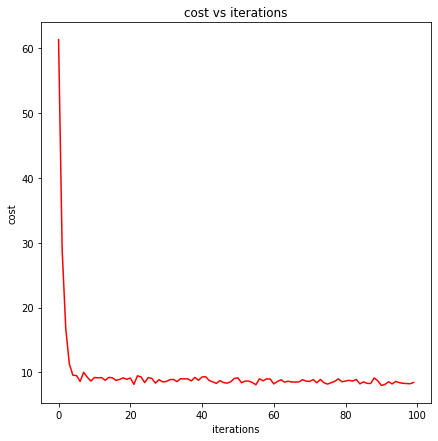

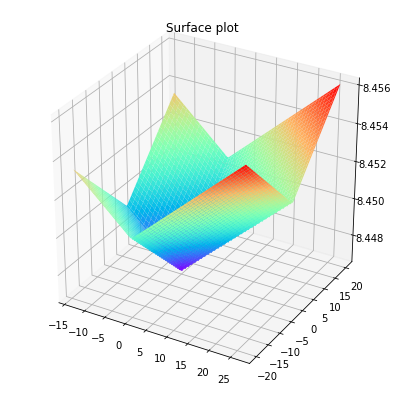

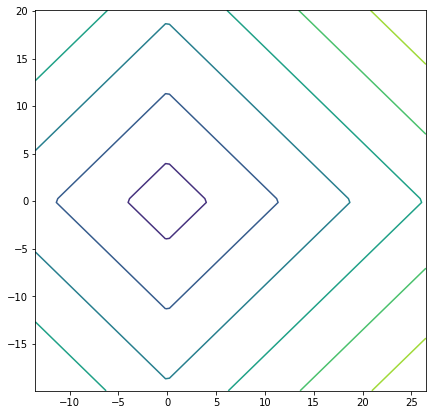

<Figure size 504x504 with 0 Axes>

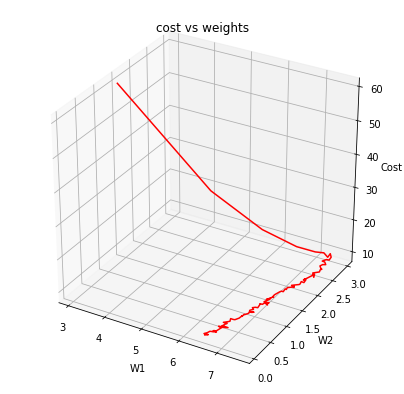

W1 : 6.4943108220508305
W2 : 0.07331134638999955
W0 : 10.6313699117746


In [43]:
def get_column(data,c):
    column = []
    for i in range(len(data)):
        column.append(data[i][c])
    return column

def stochGradDescent(theta1,theta2,theta0,x1,x2,y,i):
    gradient1 = 0
    gradient2 = 0
    gradient0 = 0
    alpha = 0.001
    lambda1 = 0.2
    h = [0 for i in range(len(x1))]
    h[i] = (theta1*x1[i]) + (theta2*x2[i]) + theta0
    gradient1 -=  (y[i]-h[i])*x1[i]
    gradient2 -= (y[i]-h[i])*x2[i]
    gradient0 -= (y[i]-h[i])
    theta1 -= alpha*(gradient1 + lambda1*0.5*np.sign(theta1))
    theta2 -= alpha*(gradient2 + lambda1*0.5*np.sign(theta2))
    theta0 -= alpha*(gradient0 + lambda1*0.5*np.sign(theta0))
    return theta1,theta2,theta0

def costfn(h,y,theta1,theta2,theta0):
    j = 0
    scale = len(h)
    lambda1 = 0.2
    for i in range(len(y)):
        j = j + float((h[i]-y[i]))**2
    j = j + (lambda1/2)*(abs(theta1)+abs(theta2)+abs(theta0))
    return j*0.5*(1/scale)

def linearRegression(x1,x2,y):
    theta1 = 0
    theta2 = 0
    theta0 = 0
    iterations = 100
    cost = []
    theta1_list = []
    theta2_list = []
    j = 0
    h = [0 for i in range(len(x1))]
    y_temp = y
    while(j<iterations):
        for i in range(len(y)):
            np.random.shuffle(y_temp)
            theta1,theta2,theta0 = stochGradDescent(theta1,theta2,theta0,x1,x2,y_temp,i) 
            for i in range(len(x1)):
                h[i] = (theta1*x1[i]) + (theta2*x2[i]) + theta0
        cost.append(costfn(h,y,theta1,theta2,theta0))
        theta1_list.append(theta1)
        theta2_list.append(theta2)
        j = j+1
    return theta1,theta1_list,theta2,theta2_list,theta0,cost,h

#Normalization
def norm(data):
    ndata = data
    for i in range(2):
        maxval = max(get_column(data,i))
        minval = min(get_column(data,i))
        for j in range(len(data)):
            ndata[j][i] = (data[j][i]-minval)/(maxval-minval)
    return ndata

#Data
data = pd.read_excel('training_feature_matrix.xlsx',header=None)
data = np.asarray(data)
data = norm(data)
x1 = data[:,0]
x2 = data[:,1]
y = data[:,-1]

#run the linear regression
theta1,theta1_list,theta2,theta2_list,theta0,cost,h = linearRegression(x1,x2,y)
 
#Plotting cost vs iterations
plt.plot(cost, 'red')
plt.title("cost vs iterations")
plt.xlabel("iterations")
plt.ylabel("cost")
plt.show() 

#plotting cost function vs w1 and w2 as a 3D graph
fig = plt.figure()
ax = plt.axes(projection='3d')
ms = np.linspace(theta1 - 20, theta1 + 20, 100)
bs = np.linspace(theta2 - 20, theta2 + 20, 100)
Xs, Ys = np.meshgrid(ms, bs)
Zs = np.array([costfn(h,y,w1,w2,1)
              for w1, w2 in zip(np.ravel(Xs), np.ravel(Ys))])

Zs = np.reshape(Zs, Xs.shape)
ax.plot_surface(Xs, Ys, Zs ,cmap=cm.rainbow)
ax.set_title('Surface plot')
plt.show()

#plotting cost function vs w1 and w2 as a contour plot
ax = plt.figure().gca()
fig = plt.figure(figsize=(7,7))
ax.plot(theta1, theta2, "b-")
ax.contour(Xs, Ys, Zs)     

#plotting cost vs weights 3D line
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot3D(theta1_list, theta2_list, cost, 'red')
ax.set_xlabel('W1')
ax.set_ylabel('W2')
ax.set_zlabel('Cost')
ax.set_title('cost vs weights')
fig.show()
plt.show()

print('W1 : ' + str(theta1))
print('W2 : ' + str(theta2))
print('W0 : ' + str(theta0))


0 Cost= 6468.734090007542
weight parameters: [16.84230182  1.00205085  0.16523427]
cost: 352.01527915088053
mse for test and predicted output: [39.10040814]


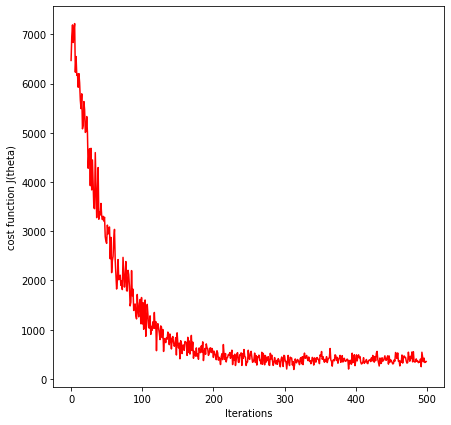

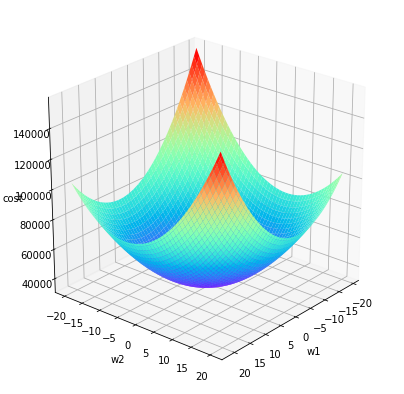

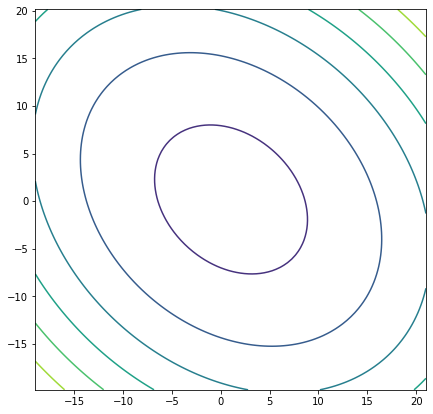

<Figure size 504x504 with 0 Axes>

In [4]:
#mini batch gradient descent with least angle regression(L1norm regularization)

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import cm
plt.rcParams['figure.figsize'] = (7.0, 7.0)

def upload_data(file_name):
  data = pd.read_excel(file_name, header=None)
  x1 = data.iloc[:,1]
  x2 = data.iloc[:,0]
  y = data.iloc[:,-1]
  mean1 = x1.mean()
  mean2 = x2.mean()
  mean3 = y.mean()
  std1 = x1.std()
  std2 = x2.std()
  std3 = y.std()
  x1 = (x1-mean1)/std1
  x2 = (x2-mean2)/std2

  X = np.column_stack((x1,x2))
  X = np.column_stack((np.ones(len(x1)),X))
  X = np.array(X)
  Y= np.array(y)
  return X,Y, mean1, mean2, mean3, std1, std2, std3

def upload_input(file_name, mean1, mean2, std1, std2):
  data = pd.read_excel(file_name, header=None)
  x1 = data.iloc[:,1]
  x2 = data.iloc[:,0]
  x1 = (x1-mean1)/std1
  x2 = (x2-mean2)/std2
  X1 = np.column_stack((x1,x2))
  X1 = np.column_stack((np.ones(len(x1)),X1))
  X1 = np.array(X1)
  return X1

def upload_output(file_name):
  data = pd.read_excel(file_name, header=None)
  Y1 = np.array(data)
  return Y1

class LeastAngleRegression(object):

  def __init__(self, alpha, iterations, lambda1):
    self.alpha = alpha
    self.iterations = iterations
    self.lambda1 = lambda1

  def calc_costfunc(self, X, Y, theta, lambda1):
    m = X.shape[0]
    n = X.shape[1]
    cost = 0.0
    sum_wt = 0.0
    for i in range(m):
      x = X[i]
      h = 0.0
      for j in range(n):
        h += theta[j] * x[j]
        sum_wt += np.abs(theta[j])
      error = h - Y[i]
      cost += error**2 

    cost = cost/(2.0)
    cost += lambda1*sum_wt
    return cost

  def create_mini_batch(self, X, Y):
    data = np.column_stack((X, Y))
    data_sample = np.random.shuffle(data)
    X_mini = data[0:50, :-1]
    Y_mini = data[0:50,-1]
    return X_mini, Y_mini

  def minibatch_grad_descent(self, X, Y):
    m = X.shape[0]
    n = X.shape[1]
    self.cost = np.zeros(self.iterations)
    self.theta = np.zeros(X.shape[1])
    for iteration in range(self.iterations):
      X_mini, Y_mini = self.create_mini_batch(X, Y)
      m_mini = X_mini.shape[0]
      temp = self.theta
      gradient = np.zeros(n)
      for i in range(m_mini):
        x = X_mini[i]
        h = 0.0
        error = 0.0
        for j in range(n):
          h += self.theta[j] * x[j]
        error = h - Y_mini[i] 
        for j in range (n):
          gradient[j] += error * x[j]
      for j in range (n):
        temp[j] = (self.theta[j]-(self.alpha*self.lambda1*np.sign(self.theta[j]))) - self.alpha * gradient[j] * (1.0/m_mini)
      self.theta = temp
      self.cost[iteration] = self.calc_costfunc(X_mini, Y_mini, self.theta, self.lambda1)
      
      if iteration%500 == 0: 
        print(iteration, "Cost=", self.cost[iteration]) 

    return self

  def predict(self, X1, Y1, mean3, std3, theta1):
    m = X1.shape[0]
    n = X1.shape[1]
    Y_predicted = np.zeros(X1.shape[0])
    mse1 = 0.0
    for i in range(m):
        x = X1[i]
        h = 0.0
        for j in range(n):
          h += theta1[j] * x[j]
        Y_predicted[i] = h
    
    for i in range(m):
        error = Y_predicted[i] - Y1[i]
        mse1 += (error**2)

    mse1 = mse1 * (1.0/m)
    return mse1, Y_predicted

  def plot_results(self, X, Y):

      #plotting cost function J vs no. of iterationsplt.subplot(1,1,1)
      plt.plot(self.cost, 'r-')
      plt.xlabel('Iterations')
      plt.ylabel('cost function J(theta)')

      #plotting cost function vs w1 and w2 as a 3D graph
      ms = np.linspace(self.theta[1] - 20, self.theta[1] + 20, 100)
      bs = np.linspace(self.theta[2] - 20, self.theta[2] + 20, 100)
      Xs, Ys = np.meshgrid(ms, bs)
      Zs = np.array([self.calc_costfunc(X, Y, [1,w1,w2], self.lambda1)
              for w1, w2 in zip(np.ravel(Xs), np.ravel(Ys))])
      Zs = np.reshape(Zs, Xs.shape)

      fig = plt.figure(figsize = (7,7))
      ax = fig.gca(projection = "3d")
      ax.set_xlabel(r'w1')
      ax.set_ylabel(r'w2')
      ax.set_zlabel(r'cost')
      ax.view_init(elev = 25, azim = 40)
      ax.plot_surface(Xs, Ys, Zs, cmap=cm.rainbow)
      
      #plotting cost function vs w1 and w2 as a contour plot
      ax = plt.figure().gca()
      fig = plt.figure(figsize=(7,7))
      ax.plot(self.theta[1], self.theta[2], "b-")
      ax.contour(Xs, Ys, Zs)

def main():
  ##upload the .xlsx file with features and outputs and enter the name below
  training_file_name = 'training_feature_matrix.xlsx'
  X, Y, mean1, mean2, mean3, std1, std2, std3 = upload_data(training_file_name)
  test_input_file_name = 'test_feature_matrix.xlsx'
  X1 = upload_input(test_input_file_name, mean1, mean2, std1, std2)
  test_output_file_name = 'test_output_vector.xlsx'
  Y1 = upload_output(test_output_file_name)
  alpha = 0

  model = LeastAngleRegression(alpha=0.01, iterations=500, lambda1=0.01).minibatch_grad_descent(X,Y)
  print("weight parameters:", model.theta)
  print("cost:", model.cost[-1])
  model.plot_results(X,Y)

  mse1, Y_predicted = LeastAngleRegression(alpha=0.01, iterations=500, lambda1=0.01).predict(X1,Y1,mean3, std3, model.theta)
  print("mse for test and predicted output:", mse1)

main()